# Breast Cancer Prediction

###### Breast  Cancer  is  the  most  oftenidentified  cancer among  women  and  major  reason  for  increasing  mortality  rate among  women.  As  the  diagnosis  of  this  disease  manually  takes long  hours and the  lesser  availability  of systems,  there  is  a  need to  develop  the  automatic  diagnosis  system  for  early  detection  of cancer.   Data   mining   techniques   contribute   a   lot   in   the development of such system. For the classification of benign and malignant   tumor   we   have   used   classification   techniques   of machine learning in which the machine is learned from the past data  and  can  predict  the  category  of  new  input. 

## Data Analysis and Machine Learning Model for the data

#### Our aim is to diagnose patients with breast cancer by analyzing the data of patients and categorizing them into two categories:
1. Benign (B)
2. Malignant (M)

#### Libraries Used:

1. pandas 
An open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
2. numpy
Fundamental package for scientific computations in Python
3. matplotlib
Matplotlib is a plotting library for the Python programming language
4. sklearn
A machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines,KNeighborsClassifier,LinearSVC

In [7]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.externals import joblib

### Data

# The data was collected from 
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

columns:

{id,	diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se,compactness_se,concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst,	perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst }


1.id:ID number


2. diagnosis:The diagnosis of breast tissues (M = malignant, B = benign)


3. radius_mean:mean of distances from center to points on the perimeter


4. texture_mean:standard deviation of gray-scale values


5. perimeter_mean:mean size of the core tumor


6. area_mean:mean area of the core tumor


7. smoothness_mean:mean of local variation in radius lengths


8. compactness_mean:mean of perimeter^2 / area - 1.0


9. concavity_mean:mean of severity of concave portions of the contour


10. concave points_mean:mean for number of concave portions of the contour


11. symmetry_mean:mean symmetry


12. fractal_dimension_mean:mean for "coastline approximation" - 1


13. radius_se:standard error for the mean of distances from center to points on the perimeter


14. texture_se:standard error for standard deviation of gray-scale values


15. perimeter_se


16. area_se


17. smoothness_se:standard error for local variation in radius lengths


18. compactness_se:standard error for perimeter^2 / area - 1.0


19. concavity_se:standard error for severity of concave portions of the contour


20. concave points_se:standard error for number of concave portions of the contour


21. symmetry_se


22. fractal_dimension_se:standard error for "coastline approximation" - 1


23. radius_worst:"worst" or largest mean value for mean of distances from center to points on the perimeter


24. texture_worst:"worst" or largest mean value for standard deviation of gray-scale values


25. perimeter_worst


26. area_worst


27. smoothness_worst:"worst" or largest mean value for local variation in radius lengths


28. compactness_worst:"worst" or largest mean value for perimeter^2 / area - 1.0


29. concavity_worst:"worst" or largest mean value for severity of concave portions of the contour


30. concave points_worst:"worst" or largest mean value for number of concave portions of the contour


31. symmetry_worst


32. fractal_dimension_worst:"worst" or largest mean value for "coastline approximation" - 1

In [8]:
#Loading the data and setting the values for X(non-class attributes) and y(target variable)
dataset=pd.read_csv('C:/Users/pc/Desktop/Breast-Cancer-Prediction-master/Breast Cancer Data Analysis/data.csv')
print("Cancer data set dimensions : {}".format(dataset.shape))
X = dataset.iloc[:, 2:32].values
y = dataset.iloc[:, 1].values


Cancer data set dimensions : (569, 33)


In [9]:
#To view a random sample for the dataset
dataset.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
106,863031,B,11.64,18.33,75.17,412.5,0.11420,0.10170,0.070700,0.03485,...,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097,NaN
493,914101,B,12.46,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,...,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028,NaN
272,8910988,M,21.75,20.99,147.30,1491.0,0.09401,0.19610,0.219500,0.10880,...,28.18,195.90,2384.0,0.12720,0.47250,0.58070,0.18410,0.2833,0.08858,NaN
226,88147101,B,10.44,15.46,66.62,329.6,0.10530,0.07722,0.006643,0.01216,...,19.80,73.47,395.4,0.13410,0.11530,0.02639,0.04464,0.2615,0.08269,NaN
201,877989,M,17.54,19.32,115.10,951.6,0.08968,0.11980,0.103600,0.07488,...,25.84,139.50,1239.0,0.13810,0.34200,0.35080,0.19390,0.2928,0.07867,NaN


## Data Preprocessing

### Checking the presence of missing values

In [13]:
dataset.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

### Checking the presence of duplicate values

In [14]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

### Aggregation

In [32]:
df=dataset.drop(['id','diagnosis'],axis=1)

In [34]:
df.aggregate(['sum', 'min','max'])

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
sum,8038.429,10975.81,52330.38,372631.9,54.82900,59.37002,50.526811,27.834994,103.0811,35.73184,...,14610.34,61031.63,501051.8,75.31773,144.67681,154.875247,65.210941,165.0530,47.76517,0.0
min,6.981,9.71,43.79,143.5,0.05263,0.01938,0.000000,0.000000,0.1060,0.04996,...,12.02,50.41,185.2,0.07117,0.02729,0.000000,0.000000,0.1565,0.05504,NaN
max,28.110,39.28,188.50,2501.0,0.16340,0.34540,0.426800,0.201200,0.3040,0.09744,...,49.54,251.20,4254.0,0.22260,1.05800,1.252000,0.291000,0.6638,0.20750,NaN


### Sampling

### Ramdom Sampling

In [45]:
df.sample(n=3, random_state=1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
421,14.69,13.98,98.22,656.1,0.1031,0.18360,0.14500,0.0630,0.2086,0.07406,...,18.34,114.10,809.2,0.1312,0.3635,0.3219,0.1108,0.2827,0.09208,NaN
47,13.17,18.66,85.98,534.6,0.1158,0.12310,0.12260,0.0734,0.2128,0.06777,...,27.95,102.80,759.4,0.1786,0.4166,0.5006,0.2088,0.3900,0.11790,NaN
292,12.95,16.02,83.14,513.7,0.1005,0.07943,0.06155,0.0337,0.1730,0.06470,...,19.93,88.81,585.4,0.1483,0.2068,0.2241,0.1056,0.3380,0.09584,NaN


### Stratified Sampling

In [46]:
df.groupby('radius_mean', group_keys=False).apply(lambda x: x.sample(min(len(x), 2)))

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.000000,0.1930,0.07818,...,19.54,50.41,185.2,0.15840,0.12020,0.0000,0.00000,0.2932,0.09382,NaN
539,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.013640,0.2037,0.07751,...,31.89,54.49,223.6,0.15960,0.30640,0.3393,0.05000,0.2790,0.10660,NaN
538,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.000000,0.1870,0.07285,...,30.92,57.17,248.0,0.12560,0.08340,0.0000,0.00000,0.3058,0.09938,NaN
568,7.760,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.000000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,NaN
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.0688,0.02564,0.3105,0.07409,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,25.220,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.184500,0.1829,0.06782,...,33.62,211.70,2562.0,0.15730,0.60760,0.6476,0.28670,0.2355,0.10510,NaN
352,25.730,17.46,174.20,2010.0,0.11490,0.23630,0.33680,0.191300,0.1956,0.06121,...,23.58,229.30,3234.0,0.15300,0.59370,0.6451,0.27560,0.3690,0.08815,NaN
180,27.220,21.87,182.10,2250.0,0.10940,0.19140,0.28710,0.187800,0.1800,0.05770,...,32.85,220.80,3216.0,0.14720,0.40340,0.5340,0.26880,0.2856,0.08082,NaN
461,27.420,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.168900,0.2061,0.05623,...,31.37,251.20,4254.0,0.13570,0.42560,0.6833,0.26250,0.2641,0.07427,NaN


### Dimensionality Reduction

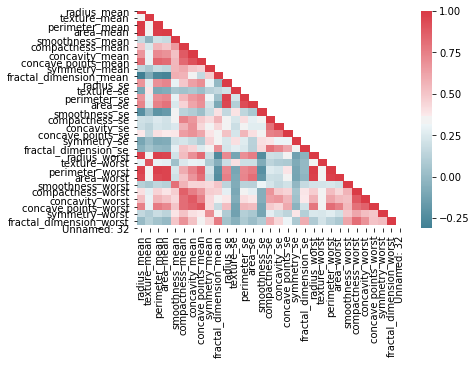

In [37]:
dt = dataset[dataset.columns[2:]]

# method : {‘pearson’, ‘kendall’, ‘spearman’}
corr = dt.corr(method="pearson") #returns a dataframe, so it can be reused

# eliminate upper triangle for readability
bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(np.bool)
corr = corr.where(bool_upper_matrix)
#display(corr)
# seaborn matrix here
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#            square=True, ax=ax)
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);